# STA 208: Homework 3 (Do not distribute)

## Due Monday 5/6/2019 at midnight

__Instructions:__ Submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.  Submit each file separately.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (10 pts)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
### Answer:
<font color=blue>
    
   Since the exponential loss is twice differentiable, $\forall x\in \mathbb R$, so it is convex if and only if $\frac {d^2 \phi(x)} {d x^2} \ge 0 $
   $$
   \frac {d \phi(x)} {dx}=-e^{-x}, \frac {d^2 \phi(x)} {d x^2}=e^{-x} \ge 0, \forall x\in \mathbb R
   $$
   
   Therefore the exponential loss function is convex.
   </font>
   
 __Demonstrate the convexity of $\phi(y_i x_i^\top \beta)$:__
 
 <font color=blue>
   The exponential loss is $\phi(y x^\top \beta) = e^{-y x^\top \beta}$, where $\beta, x \in \mathbb R^p, y\in \mathbb R$. Note that the loss is twice differentiable.
    
   The first derivative of the loss is $\nabla_{\beta}\phi(y x^\top \beta) =-yxe^ {-yx^\top\beta} $. The second derivative with respect to $\beta_i,\beta_j$ is $\frac {\partial \phi(y x^\top \beta)} {\partial \beta_i \beta_j} =y^2x_ix_je^ {-yx^\top\beta} $. So, the Hessian matrix is
   $$
   H=y^2e^ {-yx^\top\beta} x x^\top
   $$
   
   Note that $x x^\top$ is positive semidefinite, since $\forall z\in \mathbb R^p$, we have $z^\top x x^\top z=\|x^\top z\|_2^2\ge 0$. Consider $y^2e^ {-yx^\top\beta}\ge 0$, and we can conclude that the Hessian matrix $H$ is positive semidefinite.Therefore, the loss is convex.
   
   </font>
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
### Answer:
<font color=blue>
   
   The truncated quardratic loss can be written as 
   $$
   \phi(x)=\begin{cases}
    (1-x)^2, & x<1 \\
    0, & x\ge 1
    \end{cases}
   $$
   
   Obviously it is piecewise differentiable and the derivative on each piece is
   $$
   \frac {d \phi(x)} {dx}=\begin{cases}
    -2(1-x), & x<1 \\
    0, & x> 1
    \end{cases}
   $$
   
   Now, we look at the circumstance at x=1. By the definition of derivative, we have
   $$
   {lim}_{x\rightarrow1^-} \frac {\phi(x)-\phi(1)} {x-1}={lim}_{x\rightarrow1^-} \frac {(1-x)^2} {x-1}={lim}_{x\rightarrow1^-} x-1=0
   $$
   $$
   {lim}_{x\rightarrow1^+} \frac {\phi(x)-\phi(1)} {x-1}={lim}_{x\rightarrow1^+} \frac 0 {x-1}={lim}_{x\rightarrow1^+} 0=0
   $$
   
   Since ${lim}_{x\rightarrow1^-}={lim}_{x\rightarrow1^+}=0$, then $\frac {d \phi(x)} {dx}|_{x=1}=0$. The first derivative is
   $$
   \frac {d \phi(x)} {dx}=\begin{cases}
    -2(1-x), & x<1 \\
    0, & x\ge 1
    \end{cases}
   $$
   
   In terms of second derivative, again, it is twice differentiable on each piece, but when x=1, we have
   $$
   {lim}_{x\rightarrow1^-} \frac {\frac {d \phi(x)} {dx}-0} {x-1}={lim}_{x\rightarrow1^-} \frac {-2(1-x)} {x-1}={lim}_{x\rightarrow1^-} 2=2
   $$
   $$
   {lim}_{x\rightarrow1^+} \frac {0-0} {x-1}={lim}_{x\rightarrow1^+} 0=0
   $$
   Since ${lim}_{x\rightarrow1^-}\neq{lim}_{x\rightarrow1^+}$, then $\frac {d^2 \phi(x)} {dx^2}|_{x=1}$ doesn't exist. 
   $$
   \frac {d^2 \phi(x)} {dx^2}=\begin{cases}
    2, & x<1 \\
    doesn't exist, & x=1 \\
    0, & x> 1
    \end{cases}
   $$
   Note that the loss is convex when x<1 and x>1, since the second derivative is nonnegative on the two intervals.
   
   Next, let's discuss the convexity on a interval containing 1. Assume a, b such that $a<1,b>1$, and $\forall \gamma\in(0,1)$, if
   $$
   \phi(\gamma a+(1-\gamma)b)\le\gamma\phi(a)+(1-\gamma)\phi(b)=\gamma\phi(a)
   $$
   then we can say the truncated quadratic loss is convex on this interval by definition of convex function. Now, we are going to prove the above inequality:
   $$
   \phi(\gamma a+(1-\gamma)b)-\gamma\phi(a)=\begin{cases}
    -\gamma\phi(a)\le 0, & \gamma a+(1-\gamma)b\ge1 \\
    (1-\gamma a-(1-\gamma)b)^2-\gamma(1- a)^2, & \gamma a+(1-\gamma)b < 1
    \end{cases}
   $$
   
   Let's focus on the circumstance where $\gamma a+(1-\gamma)b < 1$:
   
   $$
   (1-\gamma a-(1-\gamma)b)^2-\gamma(1- a)^2\le 0 \Leftrightarrow 1-\gamma a^2-2(1-\gamma a)b+(1-\gamma) b^2\le0
   $$
   
   Note that $1-\gamma a^2-2(1-\gamma a)b+(1-\gamma) b^2=(b-1)^2-\gamma(b-a)^2\le 0$, since $\gamma a+(1-\gamma)b < 1 \Rightarrow b-1 < \gamma (b-a)$, and $\gamma \in (0,1)$
   
   Therefore, $\phi(\gamma a+(1-\gamma)b)\le\gamma\phi(a)+(1-\gamma)\phi(b)$ holds, and the truncated quadratic loss is convex on $\mathbb R$
   
   </font>
   
   
3. hinge loss: $\phi(x) = \max\{1-x,0\}$
### Answer:

<font color=blue>
    Note that the hing loss is not differentiable at x=1, since
    $$
    {lim}_{x\rightarrow1^-} \frac {\phi(x)-\phi(1)} {x-1}={lim}_{x\rightarrow1^-} \frac {1-x} {x-1}={lim}_{x\rightarrow1^-} -1=-1
    $$
    $$
    {lim}_{x\rightarrow1^+} \frac {\phi(x)-\phi(1)} {x-1}={lim}_{x\rightarrow1^+} \frac 0 {x-1}={lim}_{x\rightarrow1^+} 0=0
    $$ 
   where ${lim}_{x\rightarrow1^-} \frac {\phi(x)-\phi(1)} {x-1}\neq{lim}_{x\rightarrow1^+} \frac {\phi(x)-\phi(1)} {x-1}$
    
   However, when $x\neq 1$, the loss is twice differentiable and the second derivative $\frac {d^2 \phi(x)} {dx^2}=0$ is nonnegative. So, $\phi(x)$ is convex on the invervals $\{x:x<1\}$ and $\{x:x>1\}$. 
   
   Next, let's look at the convexity on the interval containing 1.Assume a, b such that $a<1,b>1$, and $\forall \gamma\in(0,1)$, if
   $$
   \phi(\gamma a+(1-\gamma)b)\le\gamma\phi(a)+(1-\gamma)\phi(b)=\gamma\phi(a)
   $$
   then we can say the hinge loss is convex on this interval by definition of convex function. Now, we are going to prove the above inequality:
   $$
   \phi(\gamma a+(1-\gamma)b)-\gamma\phi(a)=\begin{cases}
    -\gamma\phi(a)\le 0, & \gamma a+(1-\gamma)b\ge1 \\
    1-\gamma a-(1-\gamma)b-\gamma(1- a)=(1-\gamma)(1-b)\le 0, & \gamma a+(1-\gamma)b < 1
    \end{cases}
   $$
   
   Therefore, $\phi(\gamma a+(1-\gamma)b)\le\gamma\phi(a)+(1-\gamma)\phi(b)$ holds, and the hinge loss is convex on $\mathbb R$
   
   
   </font>
4. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$

### Answer:
<font color=blue>
    The sigmoid loss can be written as
    $$
    \phi(x)=1 - \tanh(\kappa x)=1-(1-\frac {2e^{-\kappa x}} {e^{\kappa x}+e^{-\kappa x}})=\frac {2e^{-\kappa x}} {e^{\kappa x}+e^{-\kappa x}}=\frac {2} {e^{2\kappa x}+1}
    $$
    
   The first derivative is $\frac {d\phi(x)} {dx} =-\frac {4\kappa e^{2\kappa x}} {(e^{2\kappa x}+1)^2} $. And the second derivative is
   $$
   \frac {d^2\phi(x)} {dx^2}=8\kappa^2e^{2\kappa x}(e^{2\kappa x}+1)^{-2}(\frac {2e^{2\kappa x}} {e^{2\kappa x}+1}-1)
   $$
   
   where $8\kappa^2e^{2\kappa x}(e^{2\kappa x}+1)^{-2}\ge 0$.
   
   If $\frac {2e^{2\kappa x}} {e^{2\kappa x}+1}-1\ge 0$, ie $x \ge 0$, the loss is convex. Otherewise loss is concave.
   
   </font>
5. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


In [131]:
import numpy as np
from scipy.linalg import svd
import pandas as pd
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [132]:
x=np.arange(-4,4,0.1)
y1=np.exp(-x)
y2=[(1-i)**2 if 1-i >0 else 0 for i in x]
y3=[(1-i) if 1-i>0 else 0 for i in x]
y4=1-np.tanh(x)

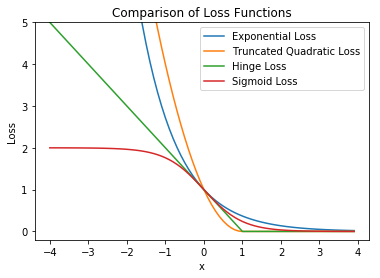

In [4]:

plt.plot(x, y1,label='Exponential Loss')
plt.plot(x, y2,label='Truncated Quadratic Loss')
plt.plot(x, y3,label='Hinge Loss')
plt.plot(x, y4,label='Sigmoid Loss')
plt.ylim([-.2,5])
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('Comparison of Loss Functions')
plt.legend()


__Exercise 2__ (20 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
### Answer:
<font color=blue>
    The empirical risk is $R_n=\frac 1n \sum_{i=1}^n \ell(y_i,x_i,\beta)$. The gradient of $R_n$ in $\beta$ is
    $$
    e_{\beta} R_n=\frac 1n \sum_{i=1}^n \nabla_{\beta} \ell(y_i,x_i,\beta)
    $$
    
   By Exercise_1, we obtained that
   $$
    \ell(y_i,x_i,\beta)=\phi(y_i x_i^\top \beta)=\begin{cases}
    (1-y_i x_i^\top \beta)^2, & y_i x_i^\top \beta<1 \\
    0, & y_i x_i^\top \beta\ge 1
    \end{cases}
   $$
   
   It is obvious that the loss function $\ell(y_i,x_i,\beta)$ has gradient with respect with $\beta$ when $\beta \notin \{\beta: y_i x_i^\top \beta=1\}$, which is
   $$
   \nabla_{\beta} \ell(y_i,x_i,\beta)=\begin{cases}
   -2y_ix_i(1-y_i x_i^\top \beta), & y_i x_i^\top \beta<1 \\
    0, & y_i x_i^\top \beta > 1
    \end{cases}
   $$
   
   Next we discuss the gradient at $\beta \in \{\beta: y_i x_i^\top \beta=1\}$ based on the definition of gradient.
   
   $\forall \beta\prime$, we define $\Delta \beta=\beta\prime-\beta$, where $\beta \in \{\beta: y_i x_i^\top \beta=1\}$. Consider the limit:
   
   $$
   {lim}_{\|\Delta \beta\|\rightarrow0} \frac {\phi(y_i x_i^\top (\beta+\Delta \beta))-\phi(y_i x_i^\top \beta)} {\|\Delta \beta\|}={lim}_{\|\Delta \beta\|\rightarrow0} \frac {\phi(y_i x_i^\top (\beta+\Delta \beta))} {\|\Delta \beta\|}=\begin{cases}
    {lim}_{\|\Delta \beta\|\rightarrow0} \frac {(y_i x_i^\top \Delta \beta)^2} {\|\Delta \beta\|}, & y_i x_i^\top \beta\prime<1 \\
    {lim}_{\|\Delta \beta\|\rightarrow0} \frac {0} {\|\Delta \beta\|}=0, & y_i x_i^\top \beta\prime\ge 1
    \end{cases}
   $$
   
   Let's look at the circumstance when $y_i x_i^\top \beta\prime<1$ closely:
   $$
   {lim}_{\|\Delta \beta\|\rightarrow0} \frac {(y_i x_i^\top \Delta \beta)^2} {\|\Delta \beta\|}={lim}_{\|\Delta \beta\|\rightarrow0}\ y_i^2 (x_i^\top e)^2 \|\Delta \beta\|=0
   $$
   where $e=\frac {\Delta \beta} {\|\Delta \beta\|}$. So the gradient at $\beta \in \{\beta: y_i x_i^\top \beta=1\}$ is 0. 
   
   Therefore the gradient of the empirical loss always exist:
   $$
   \nabla_{\beta} R_n=\frac 1n \sum_{i=1}^n (-2y_ix_i(1-y_i x_i^\top \beta))1\{y_i x_i^\top \beta<1\}
   $$
  
   </font>
2. Demonstrate that the gradient does not have continuous derivative everywhere.
### Answer:
<font color=blue>
    
   By Exercise_1, we have demonstrated that when p=1, the truncated quadratic loss doesn't have second derivative at x=1. So the gradient does not have continuous derivative everywhere.
   
   From another perspective, by the definition of derivative, we have
   $$
   {lim}_{\|\Delta \beta\|\rightarrow0} \frac {\nabla_{\beta}\phi(y_i x_i^\top\beta)|_{\beta+\Delta \beta}-\nabla_{\beta}\phi(y_i x_i^\top\beta)|_{\beta}} {\|\Delta \beta\|}=\begin{cases}
    {lim}_{\|\Delta \beta\|\rightarrow0} \frac {2 y_i^2x_i x_i^\top \Delta \beta} {\|\Delta \beta\|}, & y_i x_i^\top \beta\prime<1 \\
    {lim}_{\|\Delta \beta\|\rightarrow0} \frac {0} {\|\Delta \beta\|}=0, & y_i x_i^\top \beta\prime\ge 1
    \end{cases}
   $$
   where $\beta \in \{\beta: y_i x_i^\top \beta=1\}$ and $\Delta \beta=\beta\prime-\beta, \forall \beta\prime$
   
   Since ${lim}_{\|\Delta \beta\|\rightarrow0} \frac {2 y_i^2x_i x_i^\top \Delta \beta} {\|\Delta \beta\|}={lim}_{\|\Delta \beta\|\rightarrow0} 2 y_i^2x_i x_i^\top e=2 y_i^2x_i x_i^\top e$ where $e=\frac {\Delta \beta} {\|\Delta \beta\|}$,when $y_i x_i^\top \beta\prime<1$. The limit depends on the direction of $\Delta \beta$ and is not always equal to 0 which is the limit when $y_i x_i^\top \beta\prime\ge1$.
   
   Therefore, the gradient does not have continuous derivative everywhere.
    
   </font>
   
3. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top \beta)_+$ with a ridge regularization. Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
### Answer:
    
   __Regularized Optimization Method:__
   
   <font color=blue>
   
   Maximizing margin is equivalent to minimizing 
    $$
    \min \| \beta \|\quad \textrm{s.t.}\quad y_i x_i^\top \beta \ge 1
    $$
   
   Thus, the regularized optimization method for the truncated quadratic loss is also ridge reguarization. And the regularized empitical risk is
   
   $$
   L(\beta)=R_n + \lambda \| \beta \|^2=\frac 1n \sum_{i=1}^n \ell(y_i,x_i,\beta)+ \lambda \| \beta \|^2
   $$
   </font>
   
   __Gradient of the Empirical risk:__
   
   <font color=blue>
   
   The gradient of $L(\beta)=R_n + \lambda \| \beta \|^2\}$ is 
   
   $$
   \nabla L(\beta)=\nabla_{\beta} R_n+2\lambda  \beta =\frac 1n \sum_{i=1}^n (-2y_ix_i(1-y_i x_i^\top \beta))1\{y_i x_i^\top \beta<1\}+2\lambda  \beta
   $$
    
    
   </font>
   
4. In quasi-Newton methods a matrix ($Q$) that is a surrogate for the Hessian of the objective $L$ is used to determine step direction.

$$
\beta \gets \beta - Q^{-1} \nabla L(\beta)
$$


Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta < 1 \}) + 2 \lambda I.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization, comment on the computational complexity of this method.
### Answer:

    
   __Positive Definite Quasi-Hessian:__
   <font color=blue>
   
   $\forall z\in \mathbb {R^p}$, we have
   
   $$
   z^\top G(\beta) z=\frac 1n \sum_i 2 ((z^\top x_i x_i^\top z) 1\{ y_i x_i^\top \beta < 1 \}) + 2 \lambda z^\top z=\frac 1n \sum_i 2 \|x_i^\top z\|_2^2 1\{ y_i x_i^\top \beta < 1 \}) + 2 \lambda \|z\|_2^2\ge 0
   $$
   
   Note that $z=0 \Leftrightarrow z^\top G(\beta) z=0$, since $2 \lambda \|z\|_2^2=0 \Leftrightarrow z=0$. Therefore the quasi-Hessian is positive definite.
   </font>
    
   __Pseudo-code for Quasi-Newton Optimization:__
   
   <font color=blue>
   
   $L(\beta)$ is the loss function (regularized empirical risk), we implement quasi-Newton optimization to find the root of $\nabla L(\beta)$. Details are shown in algorithm below:

(i). Initial step: $\beta_0\gets$ a p-dimension random vector, $\beta_1\gets \beta_0-G(\beta)^{-1}\nabla L(\beta)$

(ii). While $\|\beta_1-\beta_0\|_2<\epsilon$, update $\beta_0, \beta_1$: $\beta_0\gets\beta_1$, $\beta_1\gets \beta_0-G(\beta)^{-1}\nabla L(\beta)$, where $\epsilon$ is the tolerant error
        
(iii). Eventually, return $\beta_1$
</font>

   __Computational Complexity:__
   
   <font color=blue>
   Assume the iteration time is $T$ and there are $m$ samples such that $ y_i x_i^\top \beta < 1 $ , then the computational complexity of this method is $O(Tmp^2)$, since the computational complexity of matrix inverse is $O(mp^2)$

    
   </font>

**Exercise 3 (20 pts)**

Consider the simulation below.

1. Implement minibatch stochastic gradient descent using the truncated quadratic loss.  Access the data by iteratively calling the ``sim_data`` method below.  

2. With minibatch size of $1$ (SGD).  Vary to learning schedule to be constant, decaying with $\eta_t \propto t**{-1/2}$, and $\eta_t \propto t^{-1}$.  Compare with normal noise (the ``noise_dis`` parm).

3. Vary the minibatch size to see the change in performance, with the best learning schedule from 2. When you compare two methods, make sure that you compare them with the same amount of data accessed (so use 1:10 ratio of iterations if you are comparing a minibatch ratio of 10:1).

4. Redo 2, 3 with ``noise_dis`` set to ``"chisquare"``.

### Answer 1:

<font color=blue>

I designed a class named MSGD_update to implement minibatch stochastic gradient descent using truncated quardratic loss. Details are shown in codes below:
</font>

In [249]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt

In [250]:
class DataSimulator:
    """
    Simulate the data for linear classification
    """
    def __init__(self,p,noise_dist = "normal"):
        self.beta = np.random.normal(0,1,p)
        self.noise_dist = noise_dist
        self.p = p
        
    def sim_data(self,m = 1):
        p = self.p
        X = np.random.normal(0,1,(m,p))
        if self.noise_dist == "normal":
            eps = np.random.normal(0,1,m)
        if self.noise_dist == "chisquare":
            eps = np.random.chisquare(1,m)
        z = X @ self.beta + eps
        y = 1*(z > 0)
        return X, y

In [251]:
np.random.seed(3)
ds = DataSimulator(10)# p=10
beta_true=ds.beta

In [252]:
class MSGD_update:
    """
    Truncated quardratic loss, online learner

    Attributes:
        eta: learning rate
        beta: coefficient vector
        p: dimension of X
        beta_zero: intercept
    """

    def __init__(self,p,m,
                 beta_init=None):
        """initialize and set beta"""
        self.p = p
        self.m=m
        if beta_init:
            self.beta = beta_init
        else:
            self.beta = np.zeros(p)
            
    def predict(self,x):
        """predict y with x"""
        s = x @ self.beta
        return s

    def update_beta(self,x,y,eta):
        """single step update output 0/1 loss"""
        s = self.predict(x)
        ind=1*(y*s < 1)
        dev=[-2*y[i]*(1-y[i]*x[i,:]@self.beta)*x[i,:] for i in range(self.m) if ind[i] == 1]
        grad=-1/self.m*np.sum(dev,axis=0)
        self.beta += eta * grad
        return self.beta


### Answer 2:

__(1) Constant Learning Step:__

<font color=blue>
    
   In order to choose a good constant stepsize to realize fast convergence, I tuned the constant and it turns out that the choice of c=0.03 is ok
   
  </font>
  
__(2) Decaying with $\eta_t \propto t**{-1/2}$:__

<font color=blue>
    
   Assume $\eta_t =c* t**{-1/2}$. Similarly, I tune the scalar c firstly and choose c=0.36.
   
   </font>
   
__(3) Decaying with $\eta_t \propto t**{-1}$:__

 <font color=blue>
    
   Assume $\eta_t =c* t^{-1}$. Again, I tune the scalar c firstly and choose c=0.7.
   
   </font>


In [253]:
#normal noise_dist,m=1,constant learning step: tuning step size c
np.random.seed(3)
t_iter = 1001
loss = []
for c in np.arange(0.01,1,0.01):
    msgd=MSGD_update(p=10,m=1)
    for t in range(1,t_iter):
        x,y=ds.sim_data(m=1)
        y=2*(y>0)-1
        beta=msgd.update_beta(x,y,eta=c)
    err=sum((beta-beta_true)**2)
    loss.append(err)
np.arange(0.01,1,0.01)[np.argmin(loss)]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()


0.03

In [254]:
#normal noise_dist,m=1,c*t**-1/2: tuning c
t_iter = 1001
loss = []
np.random.seed(3)
for c in np.arange(0.1,1,0.01):
    msgd=MSGD_update(p=10,m=1)
    for t in range(1,t_iter):
        x,y=ds.sim_data(m=1)
        y=2*(y>0)-1
        beta=msgd.update_beta(x,y,c*t**(-1/2))
    err=sum((beta-beta_true)**2)
    loss.append(err)
    
np.arange(0.1,1,0.01)[np.argmin(loss)]

0.3599999999999999

In [255]:
#normal noise_dist,m=1,c*t**-1: tuning c
t_iter = 1001
loss = []
np.random.seed(3)
for c in np.arange(0.1,1,0.01):
    msgd=MSGD_update(p=10,m=1)
    for t in range(1,t_iter):
        x,y=ds.sim_data(m=1)
        y=2*(y>0)-1
        beta=msgd.update_beta(x,y,c*t**(-1))
    err=sum((beta-beta_true)**2)
    loss.append(err)
    
np.arange(0.1,1,0.01)[np.argmin(loss)]

0.6999999999999996

__(4) Compare with Normal Noise:__

<font color=blue>
    
   The figure "Compare with Normal Noise" compared the performances of different decaying under Normal noise. Here I used the tuned scalar above and the decaying is $\eta=0.03$, $\eta_t =0.36t^{-1/2}$, $\eta_t =0.7t^{-1}$.
   
   It seems that decaying with $\eta_t \propto t^{-1/2}$ performs best, since it attains the smallest sum of square error after fewer iterations.
   
   </font>



In [256]:
#normal noise_dist,m=1,constant stepsize c=0.03
t_iter = 3001
np.random.seed(3)
msgd=MSGD_update(p=10,m=1)
loss_c = []
for t in range(1,t_iter):
    x,y=ds.sim_data(m=1)
    y = 2*(y > 0) - 1
    beta=msgd.update_beta(x,y,0.03)
    err=sum((beta-beta_true)**2)
    loss_c.append(err)
np.min(loss_c)

0.29185602795944365

In [257]:
#normal noise_dist,m=1,t**-1/2, using scalar c=0.36
t_iter = 3001
np.random.seed(3)
msgd=MSGD_update(p=10,m=1)
loss_sqr = []
for t in range(1,t_iter):
    x,y=ds.sim_data(m=1)
    y = 2*(y > 0) - 1
    beta=msgd.update_beta(x,y,0.36*t**(-1/2))
    err=sum((beta-beta_true)**2)
    loss_sqr.append(err)
np.min(loss_sqr)

0.21481535133842808

In [258]:
#normal noise_dist,m=1,t**-1, using scalar c=0.7
t_iter = 3001
np.random.seed(3)
msgd=MSGD_update(p=10,m=1)
loss_inv = []
for t in range(1,t_iter):
    x,y=ds.sim_data(m=1)
    y = 2*(y > 0) - 1
    beta=msgd.update_beta(x,y,0.7*t**(-1))
    err=sum((beta-beta_true)**2)
    loss_inv.append(err)
np.min(loss_inv)

0.616248902109272

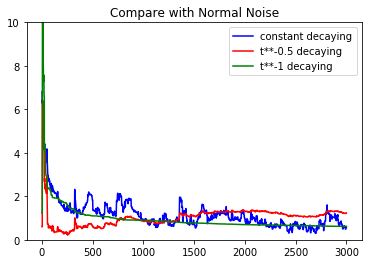

In [259]:
plt.plot(range(1,t_iter),loss_c, c='b', label='constant decaying')
plt.plot(range(1,t_iter), loss_sqr, c='r', label='t**-0.5 decaying')
plt.plot(range(1,t_iter),loss_inv, c='g', label='t**-1 decaying')
plt.legend()
plt.title("Compare with Normal Noise")
plt.ylim(0, 10)

plt.show()

### Answer 3:
<font color=blue>
    
The figure "Compare Size with Normal Noise" shows that the sum of square error will increase as the minibatch size increases. Here the minibatch size range I use is np.arange(1,100,10), and it turns out that when m=1, the error is smallest.
</font>

1.4606556133994402
1


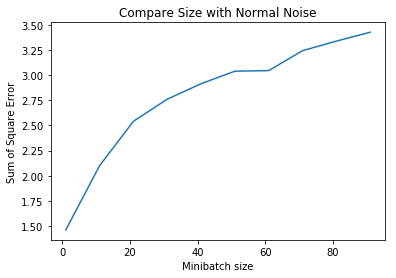

In [260]:
t_iter = 3000
np.random.seed(3)
loss_size = []
for i in np.arange(1,100,10):
    t=t_iter//i
    msgd=MSGD_update(p=10,m=i)
    for j in range(1,t):
        x,y=ds.sim_data(m=i)
        y = 2*(y > 0) - 1
        beta=msgd.update_beta(x,y,0.36*t**(-1/2))
    err=sum((beta-beta_true)**2)
    loss_size.append(err)
plt.plot(np.arange(1,100,10),loss_size)
plt.title("Compare Size with Normal Noise")
plt.xlabel("Minibatch size")
plt.ylabel("Sum of Square Error")
print(np.min(loss_size))
print(np.arange(1,100,10)[np.argmin(loss_size)])

### Answer 4:
__(1) Compare with Chi-square Noise:__

<font color=blue>
    
   The figure "Compare with Chi-square Noise" compared the performances of different decaying under Chi-square noise. Here I used the same tuned scalar as part(2) respectively which are $\eta=0.03$, $\eta_t =0.36t^{-1/2}$, $\eta_t =0.7t^{-1}$.
   
   It seems that decaying with $\eta_t \propto t^{-1/2}$ still performs best, since it attains the smallest sum of square error after fewer iterations.
   
   </font>

In [261]:
np.random.seed(3)
ds_chi = DataSimulator(10,noise_dist = "chisquare")
beta_true_chi=ds_chi.beta

In [262]:
#chi-square noise_dist,m=1,constant stepsize c=0.03
t_iter = 3001
np.random.seed(3)
msgd=MSGD_update(p=10,m=1)
loss_c_chi = []
for t in range(1,t_iter):
    x,y=ds_chi.sim_data(m=1)
    y = 2*(y > 0) - 1
    beta=msgd.update_beta(x,y,0.03)
    err=sum((beta-beta_true_chi)**2)
    loss_c_chi.append(err)
np.min(loss_c_chi)

0.7298881905228923

In [263]:
#chi-square noise_dist,m=1,t**-1/2, using scalar c=0.03
t_iter = 3001
np.random.seed(3)
msgd=MSGD_update(p=10,m=1)
loss_sqr_chi = []
for t in range(1,t_iter):
    x,y=ds_chi.sim_data(m=1)
    y = 2*(y > 0) - 1
    beta=msgd.update_beta(x,y,0.36*t**(-1/2))
    err=sum((beta-beta_true_chi)**2)
    loss_sqr_chi.append(err)
np.min(loss_sqr_chi)

0.18204180818890098

In [264]:
#chi-square noise_dist,m=1,t**-1, using scalar c=0.7
t_iter = 3001
np.random.seed(3)
msgd=MSGD_update(p=10,m=1)
loss_inv_chi = []
for t in range(1,t_iter):
    x,y=ds_chi.sim_data(m=1)
    y = 2*(y > 0) - 1
    beta=msgd.update_beta(x,y,0.7*t**(-1))
    err=sum((beta-beta_true_chi)**2)
    loss_inv_chi.append(err)
np.min(loss_inv_chi)

0.41084791855156566

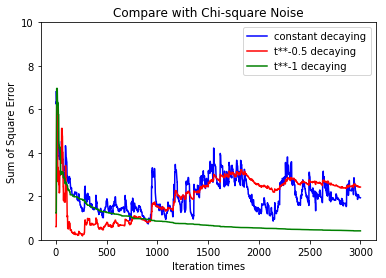

In [265]:
plt.plot(range(1,t_iter),loss_c_chi, c='b', label='constant decaying')
plt.plot(range(1,t_iter), loss_sqr_chi, c='r', label='t**-0.5 decaying')
plt.plot(range(1,t_iter),loss_inv_chi, c='g', label='t**-1 decaying')
plt.legend()
plt.title("Compare with Chi-square Noise")
plt.ylim(0, 10)
plt.xlabel("Iteration times")
plt.ylabel("Sum of Square Error")

plt.show()


__(2) Compare Size with Chi-square Noise:__
<font color=blue>
    
The figure "Compare Size with Chi-square Noise" shows similar pattern as "Compare Size with Normal Noise" that the sum of square error will increase as the minibatch size increases. Here the minibatch size range I use is also np.arange(1,100,10), and it turns out that when m=1, the error is smallest.
</font>

2.462457886776784
1


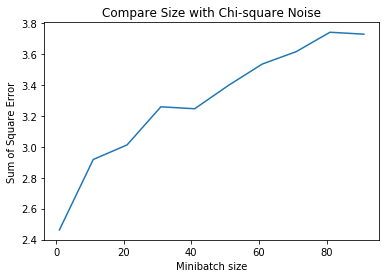

In [266]:
t_iter = 3000
np.random.seed(3)
loss_size_chi = []
for i in np.arange(1,100,10):
    t=t_iter//i
    msgd=MSGD_update(p=10,m=i)
    for j in range(1,t):
        x,y=ds_chi.sim_data(m=i)
        y = 2*(y > 0) - 1
        beta=msgd.update_beta(x,y,0.36*t**(-1/2))
    err=sum((beta-beta_true_chi)**2)
    loss_size_chi.append(err)
plt.plot(np.arange(1,100,10),loss_size_chi)
plt.title("Compare Size with Chi-square Noise")
plt.xlabel("Minibatch size")
plt.ylabel("Sum of Square Error")
print(np.min(loss_size_chi))
print(np.arange(1,100,10)[np.argmin(loss_size_chi)])

__Exercise 4.__ (50 pts) 

Text data can be converted into vector data through a vectorization operation.  A corpus is a collection of documents and the dictionary is all of the words in the corpus.  Bag-of-words models will treat each document as a set of words, ignoring the order of the words.  Then a simple vectorizer will let $X_{i,j}$ be the number of times the $j$th word is in the $i$th document.  Two vectorizers are ``sklearn.feature_extraction.text.CountVectorizer`` and ``sklearn.feature_extraction.text.TfidfVectorizer``.

Below is an import of a reuters dataset.  I have written a def to process a single file.  Construct a response variable that has three categories, if the topic is 'earn', 'acq', or another category.  Import all of the data and construct two sparse vectorized matrices---look at ``scipy.sparse``---based on the two above vectorizations.  Use sklearn svm.SVC on the TRAIN split and predict on the TEST split.  Plot your ROC and PR curves for predicting 'earn' (versus everything else); tune the kernel and C parameters.  Do the same for predicting 'acq' versus everything else.  Write a paragraph summarizing the performance and tuning.

In [1]:
from lxml import html, etree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics
from scipy.sparse import csr_matrix

In [2]:
import nltk
nltk.download()
# Download Corpora -> stopwords, Models -> punkt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
def parse_reu(reu):
    """Parses the etree object and returns a list of dictionary of reuters attr
    Output: {'topics': the topic of the article, 'places': where it is located, 
        'split': training/test split, 'body':the text of the article as a set of words with stopwords removed}
    """
    root= reu.getroot()
    articles = root.body.getchildren()
    stop_words = set(stopwords.words('english'))
    reu_pl = []
    for a in articles:
        reu_parse = {}
        if a.attrib['topics'] != 'YES':
            next
        topics = a.find('topics').findall('d')
        if topics:
            reu_parse['topics'] = [t.text for t in topics]
        else:
            reu_parse['topics'] = []
        places = a.find('places').findall('d')
        if places:
            reu_parse['places'] = [t.text for t in places]
        reu_parse['split'] = a.attrib['lewissplit']
        rtxt = a.find('text')
        word_tokens = word_tokenize(rtxt.text_content())
        filtered_sentence = set([w.lower() for w in word_tokens if not w in stop_words])
        reu_parse['body'] = filtered_sentence
        reu_pl.append(reu_parse)
    return reu_pl

In [4]:
reu = html.parse("reuters/reut2-000.sgm") #You will have to do this for all sgm files here

In [5]:
reu_pl = parse_reu(reu)

In [6]:
print(reu_pl[0]['topics'])
" ".join(reu_pl[0]['body'])

['cocoa']


'4,351 again 1,875 buyers liquor showers review fob season continued light booked come fit thousand hands dificulties spot weekly bahia throughout still humidity estimated experiencing 1986/87 published 2,375 january in 0.39 cumulative processors sales 350 york final 2,400 shippers certificates butter 4,345 doubts 22 last rose +bahia restored with - said aug/sept 4,450 uruguay 28 period would ends harvesting kilos normal lower hundred 1987/88 improving exporters areas 155,221 cocoa tonne currency 2,380 midday early there recent 1,850 superior+ 60 july 785 trade alleviating earlier feb arrivals prospects cruzados although covertible consignment going 2,325 part 5.81 also currently mln 26 brazilian destinations times 1,880 routine 1,870 obtaining ended u.s. 1,750 quality late the week 35 sept named reuter 4,340 almost dlrs delivered good ports around 5.93 making june/july arroba included 6.2 limited smith end april/may . temporao since per 15 offer year 2.27 oct/dec available view 4,350 

In [7]:
file=["reuters/reut2-00" + str(i)+".sgm" if i<10 else "reuters/reut2-0" + str(i)+".sgm" for i in range(22)]
word=reu_pl
for i in range(1,22):
    dirt=file[i]
    reu_i = html.parse(dirt)
    reu_pl_i = parse_reu(reu_i)
    word+=reu_pl_i
len(word)

21578

In [8]:
word_body=[" ".join(i['body']) for i in word if 'body'in i]
word_topic=[" ".join(i['topics']) for i in word if 'body'in i]

In [9]:
def tuning(c,kernel,X,y,X_val,y_val):
    accu_list=[]
    for i in c:
        svm=SVC(C=i,gamma='auto',kernel=kernel)
        svm.fit(X,y)
        accu=svm.score(X_val,y_val)
        accu_list.append(accu)
    return accu_list

### Answer 1: Predicting 'earn'

The response variable y is binary: y=1 if the "topics" contains "earn", otherwise y=0

__(1)CountVectorizer:__

__Tuning C and Kernel:__


<font color=blue>
Firstly, I tune the parameter "C" under kernel:'rbf','linear','poly','sigmoid' respectively to obtain an appropriate "C" corresponding to each kernel. In order to tuning parameter and kernel, I split the training dataset into a sub-training set and validation set.
    
   The table below compares the accuracy under different kernels and values of C:
   
    
   <table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>C=0.1</td><td>C=0.5</td><td>C=1</td><td>C=5</td><td>C=10</td></tr>
    <tr><td>rbf</td><td>0.818</td><td>0.818</td><td>0.829</td><td>0.928</td><td>0.942</td></tr>
    <tr><td>linear</td><td>0.967</td><td>0.965</td><td>0.967</td><td>0.964</td><td>0.964</td></tr>
    <tr><td>poly</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td></tr>
    <tr><td>sigmoid</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.907</td><td>0.928</td></tr>
</table>

Then, compare the four models with different kernels using the correponding tuned "C", and it turns out that the linear kernel model with C=0.1 performs best(with largest accurancy). 

 </font>

__(2)TfidfVectorizer:__

__Tuning C and Kernel:__


<font color=blue>
Repeat the process as above and the table compares the accuracy under different kernels and values of C as below:
    
    
   <table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>C=0.1</td><td>C=0.5</td><td>C=1</td><td>C=5</td><td>C=10</td></tr>
    <tr><td>rbf</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td></tr>
    <tr><td>linear</td><td>0.952</td><td>0.970</td><td>0.972</td><td>0.967</td><td>0.966</td></tr>
    <tr><td>poly</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td></tr>
    <tr><td>sigmoid</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td><td>0.818</td></tr>
</table>

Compare the four models with different kernels using the correponding tuned "C", and again the linear kernel model with C=0.1 performs best(with largest accurancy). 

 </font>
 
__(3)Comparision: CountVectorizer vs TfidfVectorizer:__

__AUC and F1_Score:__
<font color=blue>
   
   
   The table below gives the AUC and F1_Score:
   
   
   <table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>CountVectorizer</td><td>TfidfVectorizer</td></tr>
    <tr><td>AUC</td><td>0.986</td><td>0.993</td></tr>
    <tr><td>F1_Score</td><td>0.927</td><td>0.927</td></tr>
</table>

</font>

__ROC curve and PR curve:__
<font color=blue>
    
    
   The figure "ROC curve for predicting 'earn':CountVectorizer vs TfidfVectorizer" compares the ROC curves of CountVectorizer and TfidfVectorizer methods. We can see similar patterns that both the ROC curves are located at the top left and very closed, indicating good performance of both models, while TfidfVectorizer methods seems to be slightly above.
   
   The figure "PR curve for predicting 'earn':CountVectorizer vs TfidfVectorizer" compares the PR curves of CountVectorizer and TfidfVectorizer methods. Again, both the PR curves are located at the top right and very closed, which implies both models perform well, while the model under TfidfVectorizer methods seems to be still slightly above.


In [10]:
# Count vectorization
x_vec_count=CountVectorizer()
x_count=x_vec_count.fit_transform(word_body)
x_count.shape

(21578, 48369)

In [11]:
#containing "earn" : 1 otherwise -1
y_earn=[1 if 'earn' in word_topic[i] else 0 for i in range(len(word_topic))]

In [12]:
X_tr_cn,X_te_cn,y_tr_ear,y_te_ear=model_selection.train_test_split(x_count,y_earn,test_size=0.2,random_state=1)
X_trr_cn,X_val_cn,y_trr_ear,y_val_ear=model_selection.train_test_split(X_tr_cn,y_tr_ear,test_size=0.2,random_state=1)

In [474]:
# Tuning C
c=[0.1,0.5,1,5,10]
kernel=['rbf','linear','poly','sigmoid']
accu_kernel=[]
for k in kernel:
    accu_k=tuning(c,k,X_trr_cn,y_trr_ear,X_val_cn,y_val_ear)
    print(k+': '+str(c[np.argmax(accu_k)]))
    accu_kernel.append(accu_k)

rbf: 10
linear: 0.1
poly: 0.1
sigmoid: 10


In [509]:
accu_kernel

[[0.8178395598030698,
  0.8178395598030698,
  0.8291340863017665,
  0.927599189110918,
  0.9417897480451781],
 [0.9672748334781349,
  0.9649580075296843,
  0.9669852302345786,
  0.9640891977990154,
  0.9635099913119027],
 [0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698],
 [0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.9067477555748624,
  0.927599189110918]]

In [481]:
ck=[10,0.1,0.1,10]
kernel=['rbf','linear','poly','sigmoid']
accu_ker_c=[]
for j in range(4):
    svm_kc=SVC(C=ck[j],kernel=kernel[j],gamma='auto')
    svm_kc.fit(X_trr_cn,y_trr_ear)
    accu_kc=svm_kc.score(X_val_cn,y_val_ear)
    accu_ker_c.append(accu_kc)
m=np.argmax(accu_ker_c)
print(kernel[m]+str(ck[m]))

linear0.1


In [482]:
ear_cn_f=SVC(C=0.1,gamma='auto',kernel='linear',probability=True)
ear_cn_f.fit(X_tr_cn,y_tr_ear)
ear_cn_score=ear_cn_f.predict_proba(X_te_cn)


In [488]:
fpr_ear_cn, tpr_ear_cn, thresholds_ear_cn=metrics.roc_curve(y_te_ear,ear_cn_score[:,1])
prec_ear_cn, rec_ear_cn, threshs_ear_cn = metrics.precision_recall_curve(y_te_ear,ear_cn_score[:,1])
auc_ear_cn=metrics.roc_auc_score(y_te_ear,ear_cn_score[:,1])
ear_cn_pred=ear_cn_f.predict(X_te_cn)
f1_ear_cn=metrics.f1_score(y_te_ear,ear_cn_pred)

In [514]:
print(auc_ear_cn)
f1_ear_cn

0.9860203474613437


0.927143778207608

In [483]:
#Repeat the whole process using TfidfVectorizer
x_vec_tf=TfidfVectorizer()
x_vec_tf.fit(word_body)
x_tf=x_vec_tf.transform(word_body)
x_tf.shape

(21578, 48369)

In [22]:
X_tr_tf,X_te_tf,y_tr_ear_tf,y_te_ear_tf=model_selection.train_test_split(x_tf,y_earn,test_size=0.2,random_state=1)
X_trr_tf,X_val_tf,y_trr_ear_tf,y_val_ear_tf=model_selection.train_test_split(X_tr_tf,y_tr_ear_tf,test_size=0.2,random_state=1)

NameError: name 'x_tf' is not defined

In [485]:
c=[0.1,0.5,1,5,10]
kernel=['rbf','linear','poly','sigmoid']
accu_kernel_tf=[]
for k in kernel:
    accu_k=tuning(c,k,X_trr_tf,y_trr_ear_tf,X_val_tf,y_val_ear_tf)
    print(k+': '+str(c[np.argmax(accu_k)]))
    accu_kernel_tf.append(accu_k)

rbf: 0.1
linear: 1
poly: 0.1
sigmoid: 0.1


In [510]:
accu_kernel_tf

[[0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698],
 [0.9519258615696495,
  0.9701708659136983,
  0.9719084853750362,
  0.9672748334781349,
  0.966406023747466],
 [0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698],
 [0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698,
  0.8178395598030698]]

In [491]:
ck_tf=[0.1,1,0.1,0.1]
kernel=['rbf','linear','poly','sigmoid']
accu_ker_tf=[]
for j in range(4):
    svm_kc=SVC(C=ck_tf[j],kernel=kernel[j],gamma='auto')
    svm_kc.fit(X_trr_tf,y_trr_ear_tf)
    accu_kc=svm_kc.score(X_val_tf,y_val_ear_tf)
    accu_ker_tf.append(accu_kc)
m=np.argmax(accu_ker_tf)
print(kernel[m]+str(ck_tf[m]))

linear1


In [23]:
type(X_tr_cn)

scipy.sparse.csr.csr_matrix

In [492]:
ear_tf_f=SVC(C=1,gamma='auto',kernel='linear',probability=True)
ear_tf_f.fit(X_tr_tf,y_tr_ear_tf)
ear_tf_score=ear_tf_f.predict_proba(X_te_tf)
ear_tf_pred=ear_tf_f.predict(X_te_tf)

In [493]:
fpr_ear_tf, tpr_ear_tf, thresholds_ear_tf=metrics.roc_curve(y_te_ear_tf,ear_tf_score[:,1])
prec_ear_tf, rec_ear_tf, threshs_ear_tf = metrics.precision_recall_curve(y_te_ear_tf,ear_tf_score[:,1])
auc_ear_tf=metrics.roc_auc_score(y_te_ear_tf,ear_tf_score[:,1])
f1_ear_tf=metrics.f1_score(y_te_ear_tf,ear_tf_pred)

In [515]:
print(auc_ear_tf)
f1_ear_tf

0.9925412181555283


0.9269553975436329

Text(0.5, 1.0, "ROC curve for predicting 'earn':CountVectorizer vs TfidfVectorizer")

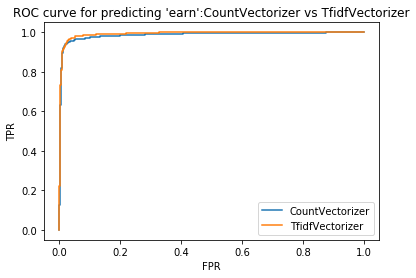

In [505]:
plt.plot(fpr_ear_cn,tpr_ear_cn,label='CountVectorizer')
plt.plot(fpr_ear_tf,tpr_ear_tf,label='TfidfVectorizer')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for predicting 'earn':CountVectorizer vs TfidfVectorizer")

Text(0.5, 1.0, "PR curve for predicting 'earn':CountVectorizer vs TfidfVectorizer")

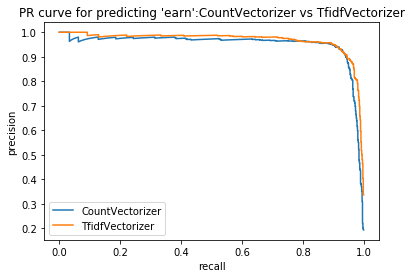

In [506]:
plt.plot(rec_ear_cn,prec_ear_cn,label='CountVectorizer')
plt.plot(rec_ear_tf,prec_ear_tf,label='TfidfVectorizer')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.title("PR curve for predicting 'earn':CountVectorizer vs TfidfVectorizer")

### Answer 2: Predicting 'acq'

#### Repeat the Process in Answer 1

In this part, I define the value of response variable y again: y=1 if the "topics" contains "acq", otherwise y=0.

__(1)CountVectorizer:__

__Tuning C and Kernel:__


<font color=blue>
Tune the parameter "C" under kernel:'rbf','linear','poly','sigmoid' respectively to obtain an appropriate "C" corresponding to each kernel. In order to tuning parameter and kernel, I split the training dataset into a sub-training set and validation set.
    
   The table below compares the accuracy under different kernels and values of C:
   
    
   <table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>C=0.1</td><td>C=0.5</td><td>C=1</td><td>C=5</td><td>C=10</td></tr>
    <tr><td>rbf</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.884</td></tr>
    <tr><td>linear</td><td>0.963</td><td>0.960</td><td>0.960</td><td>0.960</td><td>0.960</td></tr>
    <tr><td>poly</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td></tr>
    <tr><td>sigmoid</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td></tr>
</table>

Then, compare the four models with different kernels using the correponding tuned "C", and it turns out that the linear kernel model with C=0.1 performs best(with largest accurancy). 

 </font>

__(2)TfidfVectorizer:__

__Tuning C and Kernel:__


<font color=blue>
Repeat the process as above and the table compares the accuracy under different kernels and values of C as below:
    
    
   <table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>C=0.1</td><td>C=0.5</td><td>C=1</td><td>C=5</td><td>C=10</td></tr>
    <tr><td>rbf</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td></tr>
    <tr><td>linear</td><td>0.921</td><td>0.963</td><td>0.966</td><td>0.962</td><td>0.961</td></tr>
    <tr><td>poly</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td></tr>
    <tr><td>sigmoid</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td><td>0.883</td></tr>
</table>

Compare the four models with different kernels using the correponding tuned "C", and again the linear kernel model with C=1 performs best(with largest accurancy). 

 </font>
 
__(3)Comparision: CountVectorizer vs TfidfVectorizer:__

__AUC and F1_Score:__
<font color=blue>
   
   
   The table below gives the AUC and F1_Score:
   
   
   <table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>CountVectorizer</td><td>TfidfVectorizer</td></tr>
    <tr><td>AUC</td><td>0.969</td><td>0.983</td></tr>
    <tr><td>F1_Score</td><td>0.842</td><td>0.860</td></tr>
</table>

</font>

__ROC curve and PR curve:__
<font color=blue>
   
   Both ROC curves and PR curves for predicting "acq" show very similar patterns as those for predicting "earn".
   
    
   The figure "ROC curve for predicting 'acq':CountVectorizer vs TfidfVectorizer" compares the ROC curves of CountVectorizer and TfidfVectorizer methods. We can see similar patterns that both the ROC curves are located at the left top and very closed, indicating good performance of both models. Also notice that the model under TfidfVectorizer methods seems to be slightly above, which implies a little bit improvement. 
   
   The figure "PR curve for predicting 'acq':CountVectorizer vs TfidfVectorizer" compares the PR curves of CountVectorizer and TfidfVectorizer methods. Again, both the PR curves are located at the right top and very closed, which implies both models perform well. Also notice that the model under TfidfVectorizer methods seems to be still slightly above, which implies a little bit improvement.

In [494]:
#"acq" is 1 otherwise -1
y_acq=[1 if 'acq' in word_topic[i] else 0 for i in range(len(word_topic))]

In [495]:
# Count Vectorization and predicting "acq"
X_tr_cn_acq,X_te_cn_acq,y_tr_acq,y_te_acq=model_selection.train_test_split(x_count,y_acq,test_size=0.2,random_state=1)
X_trr_cn_acq,X_val_cn_acq,y_trr_acq,y_val_acq=model_selection.train_test_split(X_tr_cn_acq,y_tr_acq,test_size=0.2,random_state=1)


In [496]:
c=[0.1,0.5,1,5,10]
kernel=['rbf','linear','poly','sigmoid']
accu_kernel_acq=[]
for k in kernel:
    accu_k=tuning(c,k,X_trr_cn_acq,y_trr_acq,X_val_cn_acq,y_val_acq)
    print(k+': '+str(c[np.argmax(accu_k)]))
    accu_kernel_acq.append(accu_k)

rbf: 10
linear: 0.1
poly: 0.1
sigmoid: 0.1


In [511]:
accu_kernel_acq

[[0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8835794960903562],
 [0.96293078482479,
  0.9603243556327831,
  0.9600347523892268,
  0.9600347523892268,
  0.9600347523892268],
 [0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999],
 [0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999]]

In [497]:
ck_acq=[10,0.1,0.1,0.1]
kernel=['rbf','linear','poly','sigmoid']
accu_ker_acq=[]
for j in range(4):
    svm_kc=SVC(C=ck_acq[j],kernel=kernel[j],gamma='auto')
    svm_kc.fit(X_trr_cn_acq,y_trr_acq)
    accu_kc=svm_kc.score(X_val_cn_acq,y_val_acq)
    accu_ker_acq.append(accu_kc)
m=np.argmax(accu_ker_acq)
print(kernel[m]+str(ck_acq[m]))

linear0.1


In [498]:
acq_cn_f=SVC(C=0.1,gamma='auto',kernel='linear',probability=True)
acq_cn_f.fit(X_tr_cn_acq,y_tr_acq)
acq_cn_score=acq_cn_f.predict_proba(X_te_cn_acq)
acq_cn_pred=acq_cn_f.predict(X_te_cn_acq)

In [499]:
fpr_acq_cn, tpr_acq_cn, thresholds_acq_cn=metrics.roc_curve(y_te_acq,acq_cn_score[:,1])
prec_acq_cn, rec_acq_cn, threshs_acq_cn = metrics.precision_recall_curve(y_te_acq,acq_cn_score[:,1])
auc_acq_cn=metrics.roc_auc_score(y_te_acq,acq_cn_score[:,1])
f1_acq_cn=metrics.f1_score(y_te_acq,acq_cn_pred)

In [517]:
print(auc_acq_cn)
f1_acq_cn

0.9695617604339346


0.841991341991342

In [500]:
#Repeat the whole process using TfidfVectorizer to predict "acq"
X_tr_tf_acq,X_te_tf_acq,y_tr_acq_tf,y_te_acq_tf=model_selection.train_test_split(x_tf,y_acq,test_size=0.2,random_state=1)
X_trr_tf_acq,X_val_tf_acq,y_trr_acq_tf,y_val_acq_tf=model_selection.train_test_split(X_tr_tf_acq,y_tr_acq_tf,test_size=0.2,random_state=1)

In [501]:
c=[0.1,0.5,1,5,10]
kernel=['rbf','linear','poly','sigmoid']
accu_kernel_tf_acq=[]
for k in kernel:
    accu_k=tuning(c,k,X_trr_tf_acq,y_trr_acq_tf,X_val_tf_acq,y_val_acq_tf)
    print(k+': '+str(c[np.argmax(accu_k)]))
    accu_kernel_tf_acq.append(accu_k)

rbf: 0.1
linear: 1
poly: 0.1
sigmoid: 0.1


In [516]:
accu_kernel_tf_acq

[[0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999],
 [0.9206487112655661,
  0.9626411815812337,
  0.9658268172603534,
  0.9617723718505647,
  0.9611931653634521],
 [0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999],
 [0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999,
  0.8832898928467999]]

In [502]:
ck_tf_acq=[0.1,1,0.1,0.1]
kernel=['rbf','linear','poly','sigmoid']
accu_ker_tf_acq=[]
for j in range(4):
    svm_kc=SVC(C=ck_tf_acq[j],kernel=kernel[j],gamma='auto')
    svm_kc.fit(X_trr_tf_acq,y_trr_acq_tf)
    accu_kc=svm_kc.score(X_val_tf_acq,y_val_acq_tf)
    accu_ker_tf_acq.append(accu_kc)
m=np.argmax(accu_ker_tf_acq)
print(kernel[m]+str(ck_tf_acq[m]))

linear1


In [503]:
acq_tf_f=SVC(C=1,gamma='auto',kernel='linear',probability=True)
acq_tf_f.fit(X_tr_tf_acq,y_tr_acq_tf)
acq_tf_score=acq_tf_f.predict_proba(X_te_tf_acq)
acq_tf_pred=acq_tf_f.predict(X_te_tf_acq)

In [504]:
fpr_acq_tf, tpr_acq_tf, thresholds_acq_tf=metrics.roc_curve(y_te_acq_tf,acq_tf_score[:,1])
prec_acq_tf, rec_acq_tf, threshs_ear_tf = metrics.precision_recall_curve(y_te_acq_tf,acq_tf_score[:,1])
auc_acq_tf=metrics.roc_auc_score(y_te_acq_tf,acq_tf_score[:,1])
f1_acq_tf=metrics.f1_score(y_te_acq_tf,acq_tf_pred)

In [518]:
print(auc_acq_tf)
f1_acq_tf

0.9832656255823486


0.8596491228070176

Text(0.5, 1.0, "ROC curve for predicting 'acq':CountVectorizer vs TfidfVectorizer")

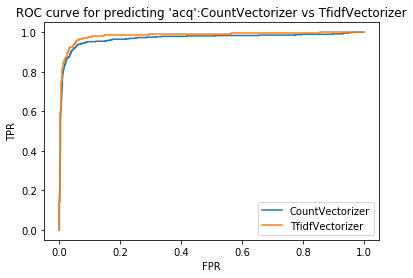

In [507]:
plt.plot(fpr_acq_cn,tpr_acq_cn,label='CountVectorizer')
plt.plot(fpr_acq_tf,tpr_acq_tf,label='TfidfVectorizer')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title("ROC curve for predicting 'acq':CountVectorizer vs TfidfVectorizer")

Text(0.5, 1.0, "PR curve for predicting 'acq':CountVectorizer vs TfidfVectorizer")

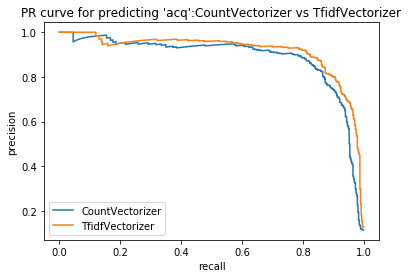

In [508]:
plt.plot(rec_acq_cn,prec_acq_cn,label='CountVectorizer')
plt.plot(rec_acq_tf,prec_acq_tf,label='TfidfVectorizer')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.title("PR curve for predicting 'acq':CountVectorizer vs TfidfVectorizer")